In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# 1. Calculate the fire spread rate

Step 1: Import Libraries and Load Data

In [32]:
import pandas as pd
# Load the data into a Pandas DataFrame
data = pd.read_excel('fp-historical-wildfire-data-2006-2023.xlsx')

In [33]:
data.sample(5)

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
5273,2009,WWF012,NaN,0.01,A,54.450783,-114.765900,Private Land,Resident,NaN,...,NaN,NaN,2009-05-04 16:45:00,0.01,2009-05-05 17:44:00,0.01,NaN,NaN,2009-05-05 17:45:00,0.01
12976,2014,LWF004,NaN,0.03,A,55.929467,-110.741267,Indian Reservation,Incendiary,NaN,...,NaN,NaN,2014-04-08 15:25:25,0.03,2014-04-08 15:25:25,0.03,NaN,NaN,2014-04-08 15:26:54,0.03
691,2006,SWF195,NaN,0.01,A,56.915083,-115.102883,Provincial Land,Lightning,NaN,...,0.8,2006-08-12 17:42:00,2006-08-12 16:59:00,0.01,2006-08-12 17:30:00,0.01,NaN,NaN,2006-08-12 18:19:00,0.01
15369,2015,MWF017,NaN,0.10,A,56.740667,-111.502667,Provincial Land,Incendiary,NaN,...,NaN,NaN,2015-05-18 04:35:00,0.10,2015-05-18 04:35:00,0.10,NaN,NaN,2015-05-18 05:45:00,0.10
16056,2015,MWF137,NaN,83.50,D,57.101283,-112.560100,Provincial Land,Lightning,NaN,...,7.8,2015-07-31 14:46:00,2015-08-01 11:21:02,89.00,2015-08-04 17:54:41,89.00,NaN,NaN,2015-08-05 18:26:35,83.50


Make a regression model with current_size, temperature,	relative_humidity,	and wind_speed 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


                            OLS Regression Results                            
Dep. Variable:           current_size   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.88
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           6.05e-13
Time:                        23:11:10   Log-Likelihood:                -74398.
No. Observations:                7093   AIC:                         1.488e+05
Df Residuals:                    7088   BIC:                         1.488e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

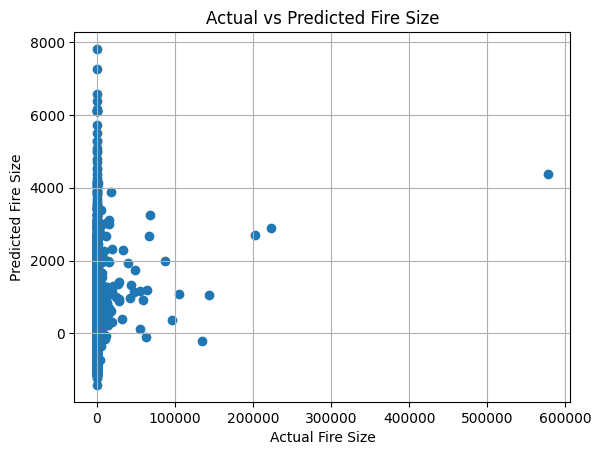

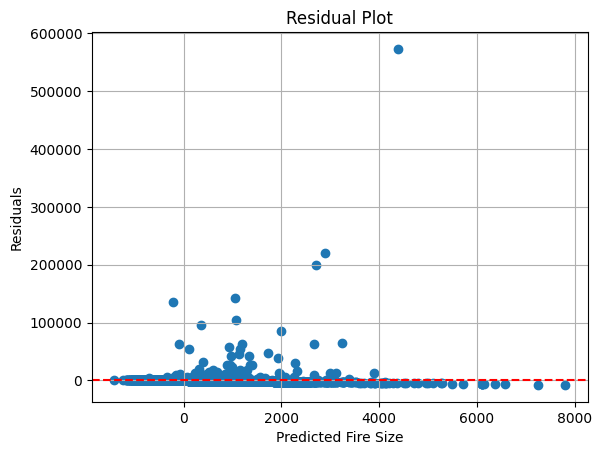

In [44]:
# Drop rows with missing values and ensure data is numeric
df1 = data[['current_size', 'temperature', 'relative_humidity', 'wind_speed', 'distance_from_water_source']].dropna()

# Convert columns to numeric, and coerce errors to NaN
for col in ['temperature', 'relative_humidity', 'wind_speed', 'current_size', 'distance_from_water_source']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Drop any rows with NaN values again after type conversion
df1 = df1.dropna()

# Check if df1 is empty after dropping NaN values
if df1.empty:
    print("Error: The DataFrame is empty after dropping rows with NaN values.")
else:
    # Define features (X) and target (y)
    X = df1[['temperature', 'relative_humidity', 'wind_speed', 'distance_from_water_source']]
    y = df1['current_size']

    # Add a constant term to the features (intercept term)
    X = sm.add_constant(X)

    # Fit the regression model using OLS
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression model
    print(model.summary())

    # Predict current_size using the test set (in this case, using the same dataset for simplicity)
    y_pred = model.predict(X)

    # Display first few predictions
    print(y_pred.head())

    # Residual plot: Actual vs. Predicted values
    plt.scatter(y, y_pred)
    plt.xlabel('Actual Fire Size')
    plt.ylabel('Predicted Fire Size')
    plt.title('Actual vs Predicted Fire Size')
    plt.grid(True)
    plt.show()

    # Plot residuals to check for randomness
    residuals = y - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Fire Size')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(0, color='red', linestyle='--')
    plt.grid(True)
    plt.show()


                            OLS Regression Results                            
Dep. Variable:           current_size   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.88
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           6.05e-13
Time:                        23:15:04   Log-Likelihood:                 19702.
No. Observations:                7093   AIC:                        -3.939e+04
Df Residuals:                    7088   BIC:                        -3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

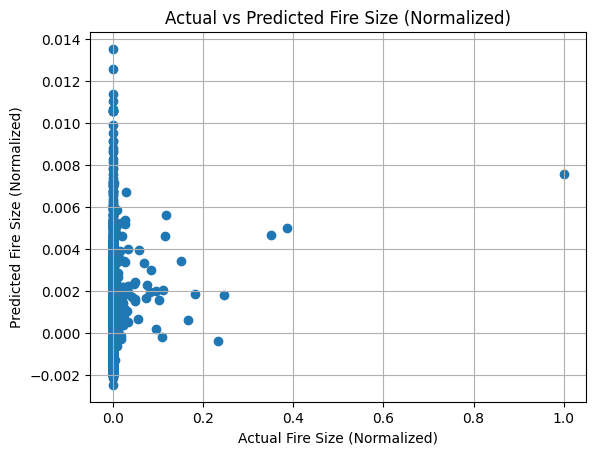

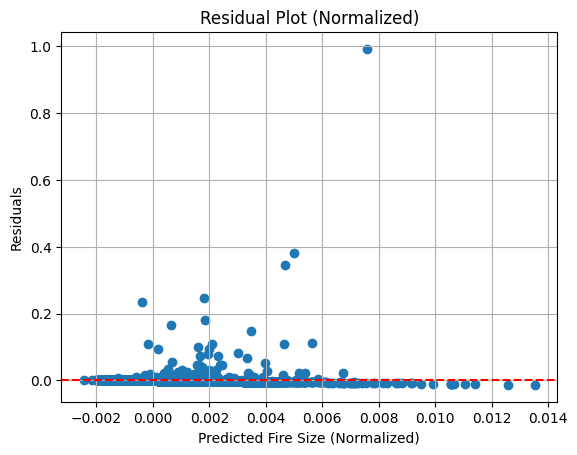

In [48]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows with missing values and ensure data is numeric
df1 = data[['current_size', 'temperature', 'relative_humidity', 'wind_speed', 'distance_from_water_source']].dropna()

# Convert columns to numeric, and coerce errors to NaN
for col in ['temperature', 'relative_humidity', 'wind_speed', 'current_size', 'distance_from_water_source']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Drop any rows with NaN values again after type conversion
df1 = df1.dropna()

# Check if df1 is empty after dropping NaN values
if df1.empty:
    print("Error: The DataFrame is empty after dropping rows with NaN values.")
else:
    # Apply MinMaxScaler to normalize features to [0, 1]
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df1)

    # Create a new DataFrame with scaled values
    df1_normalized = pd.DataFrame(scaled_data, columns=df1.columns)

    # Define features (X) and target (y)
    X = df1_normalized[['temperature', 'relative_humidity', 'wind_speed', 'distance_from_water_source']]
    y = df1_normalized['current_size']

    # Add a constant term to the features (intercept term)
    X = sm.add_constant(X)

    # Fit the regression model using OLS
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression model
    print(model.summary())

    # Predict current_size using the test set (in this case, using the same dataset for simplicity)
    y_pred = model.predict(X)

    # Display first few predictions
    print(y_pred.head())

    # Residual plot: Actual vs. Predicted values
    plt.scatter(y, y_pred)
    plt.xlabel('Actual Fire Size (Normalized)')
    plt.ylabel('Predicted Fire Size (Normalized)')
    plt.title('Actual vs Predicted Fire Size (Normalized)')
    plt.grid(True)
    plt.show()

    # Plot residuals to check for randomness
    residuals = y - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Fire Size (Normalized)')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (Normalized)')
    plt.axhline(0, color='red', linestyle='--')
    plt.grid(True)
    plt.show()


Decision Tree effect to Wild fire size

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = data[['size_class', 'temperature', 'relative_humidity', 'wind_speed']]

# Drop any rows with missing values
df2 = df2.dropna()

# Split the dataset into features (X) and target (y)
X = df2[['temperature', 'relative_humidity', 'wind_speed']]
y = df2['size_class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


Cross-Validation Accuracy Scores: [0.55133333 0.54901089 0.53100689 0.52811736 0.52122694]
Mean Cross-Validation Accuracy: 0.54


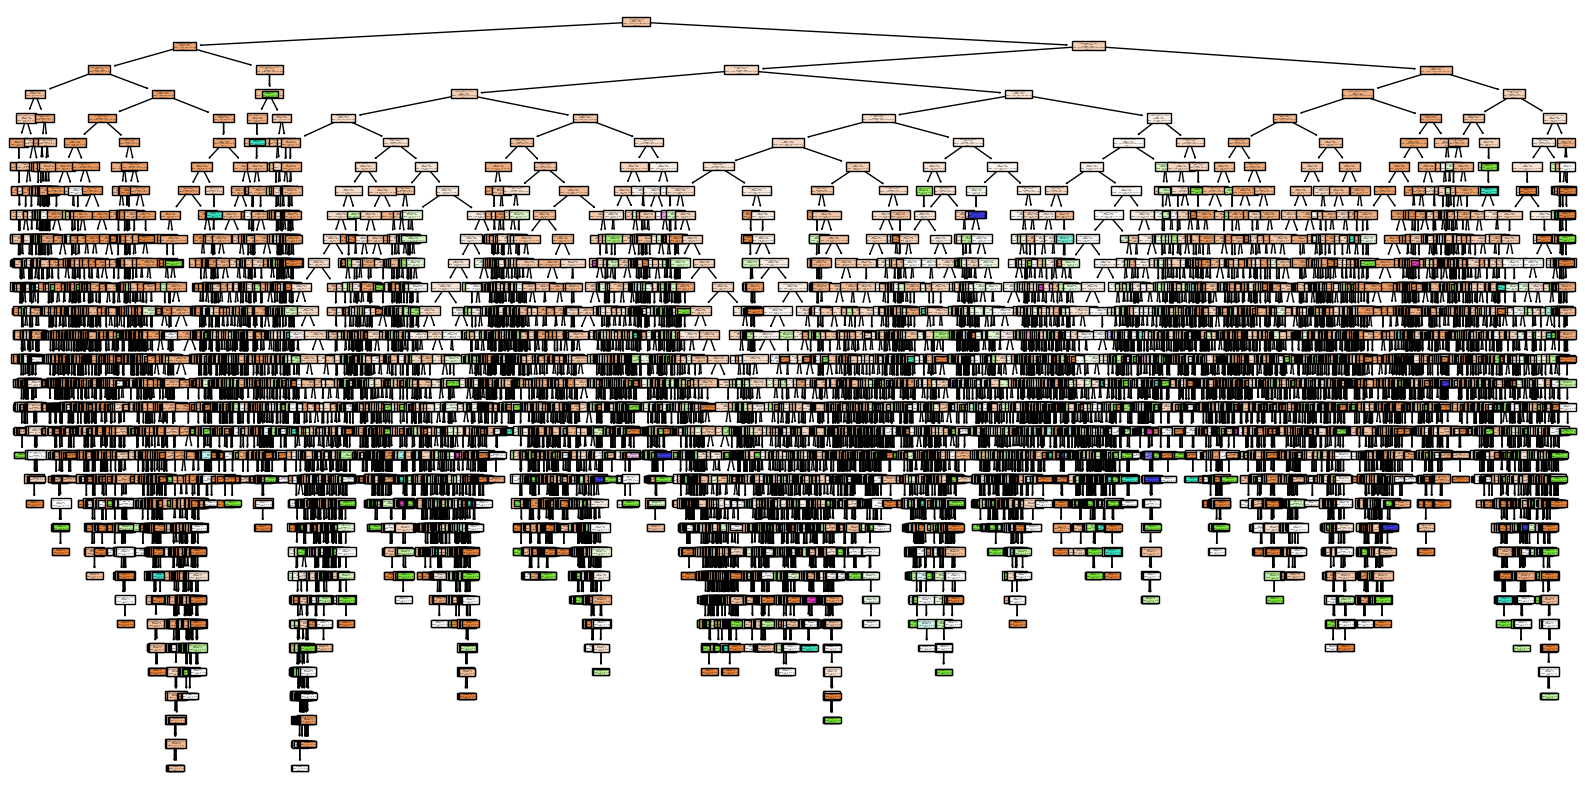

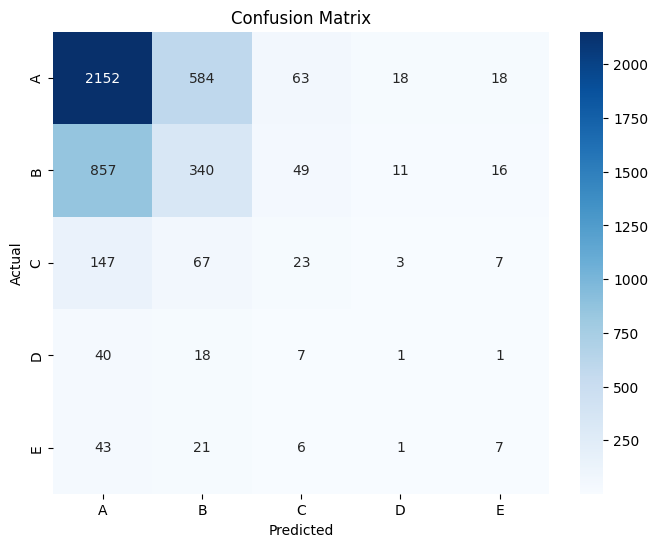

Classification Report:
              precision    recall  f1-score   support

           A       0.66      0.76      0.71      2835
           B       0.33      0.27      0.30      1273
           C       0.16      0.09      0.12       247
           D       0.03      0.01      0.02        67
           E       0.14      0.09      0.11        78

    accuracy                           0.56      4500
   macro avg       0.26      0.24      0.25      4500
weighted avg       0.52      0.56      0.54      4500



In [4]:
# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=['temperature', 'relative_humidity', 'wind_speed'], class_names=model.classes_, filled=True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Feature Importance Selection

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25321 entries, 0 to 25320
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     25321 non-null  int64  
 1   fire_number                   25321 non-null  object 
 2   fire_name                     729 non-null    object 
 3   current_size                  25321 non-null  float64
 4   size_class                    25321 non-null  object 
 5   fire_location_latitude        25321 non-null  float64
 6   fire_location_longitude       25321 non-null  float64
 7   fire_origin                   25305 non-null  object 
 8   general_cause_desc            25321 non-null  object 
 9   industry_identifier_desc      462 non-null    object 
 10  responsible_group_desc        9383 non-null   object 
 11  activity_class                15548 non-null  object 
 12  true_cause                    13551 non-null  object 
 13  f

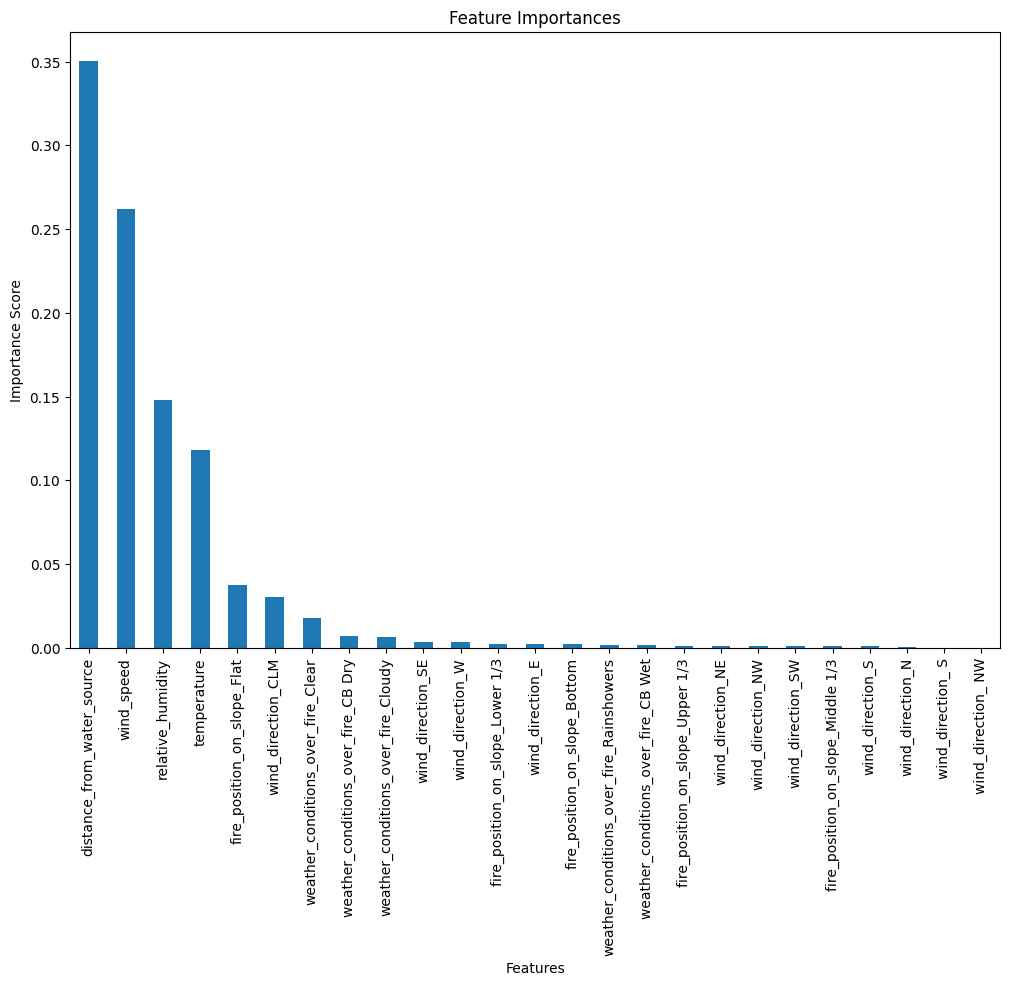

Accuracy on the test set: 0.65


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming data is already loaded as 'data')
# Drop rows with missing target values (if any)
df3 = data.dropna(subset=['size_class'])

X = df3[['fire_position_on_slope','weather_conditions_over_fire','temperature','relative_humidity','wind_direction','wind_speed', 'distance_from_water_source']]
y = df3['size_class']

# Identify categorical columns in X
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Initialize a Random Forest model for feature importance
rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)  # Using smaller model to save memory
rf.fit(X_encoded, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_encoded.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Select top features (e.g., top 10)
top_features = feature_importances.head(10).index
X_top = X_encoded[top_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train a final Random Forest model on selected features
final_rf = RandomForestClassifier(random_state=42)
final_rf.fit(X_train, y_train)

# Calculate accuracy on the test set
accuracy = final_rf.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")


In [26]:
# Print feature importances
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: temperature, Importance: 0.11779625996170258
Feature: relative_humidity, Importance: 0.1480990369338607
Feature: wind_speed, Importance: 0.26207491300735286
Feature: distance_from_water_source, Importance: 0.3503272317471065
Feature: fire_position_on_slope_Bottom, Importance: 0.0022069859545129204
Feature: fire_position_on_slope_Flat, Importance: 0.03730570559148165
Feature: fire_position_on_slope_Lower 1/3, Importance: 0.002499217118448842
Feature: fire_position_on_slope_Middle 1/3, Importance: 0.0008105658681371603
Feature: fire_position_on_slope_Upper 1/3, Importance: 0.0009824444164933332
Feature: weather_conditions_over_fire_CB Dry, Importance: 0.00694939797295474
Feature: weather_conditions_over_fire_CB Wet, Importance: 0.0015739122084342918
Feature: weather_conditions_over_fire_Clear, Importance: 0.01766618284658243
Feature: weather_conditions_over_fire_Cloudy, Importance: 0.006525353938794725
Feature: weather_conditions_over_fire_Rainshowers, Importance: 0.001627545667

In [10]:
X.head()

,fire_year,fire_number,current_size,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,fire_start_date,reported_date,dispatched_resource,...,fuel_type,initial_action_by,fire_fighting_start_date,fire_fighting_start_size,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,ex_fs_date,ex_hectares


Accuracy: 0.60
Cross-Validation Accuracy Scores: [0.5792695  0.59774882 0.62559242 0.59616904 0.58175355]
Mean Cross-Validation Accuracy: 0.60


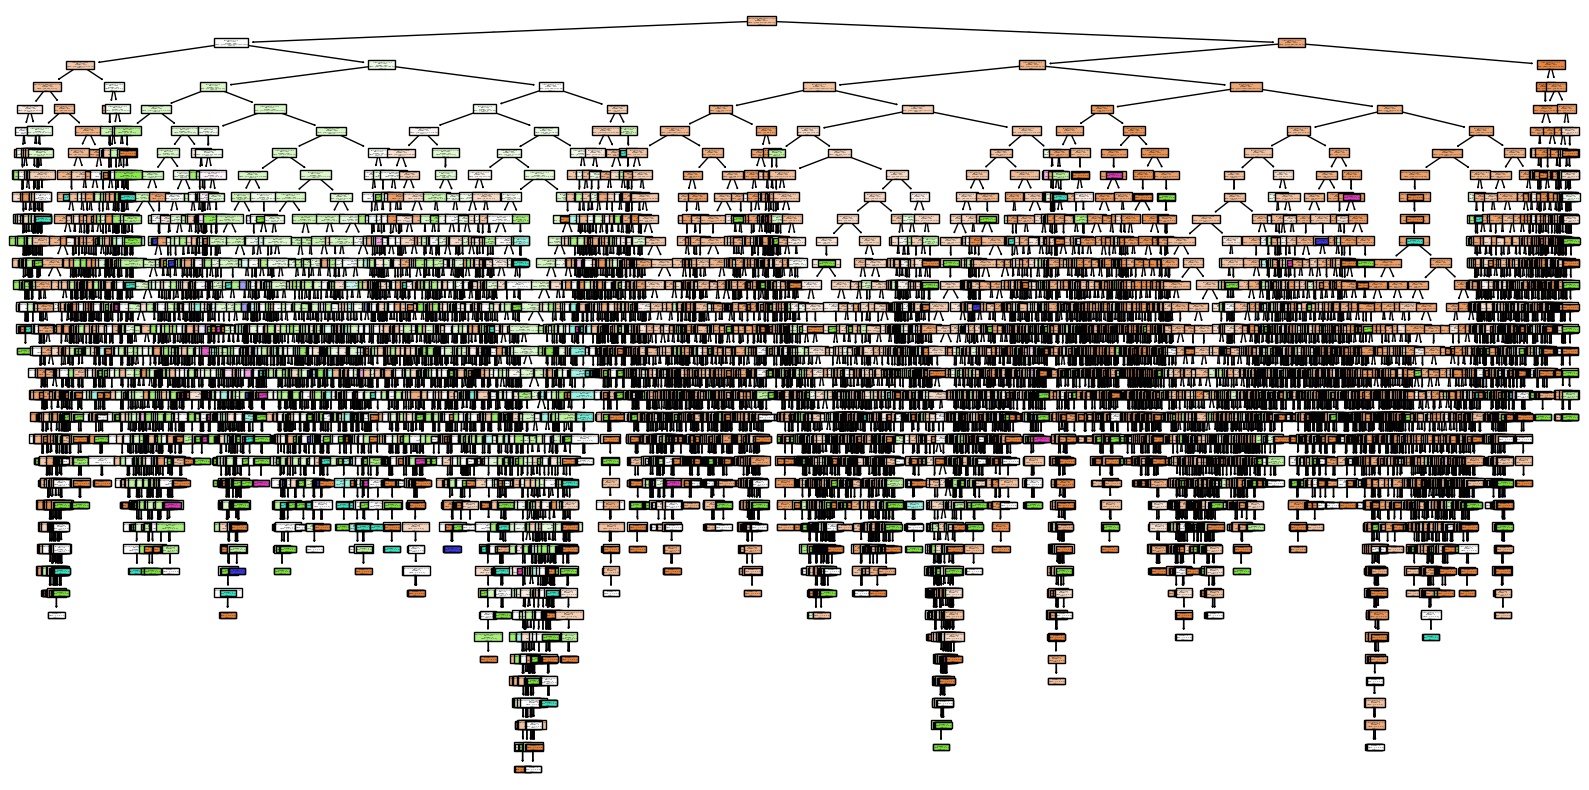

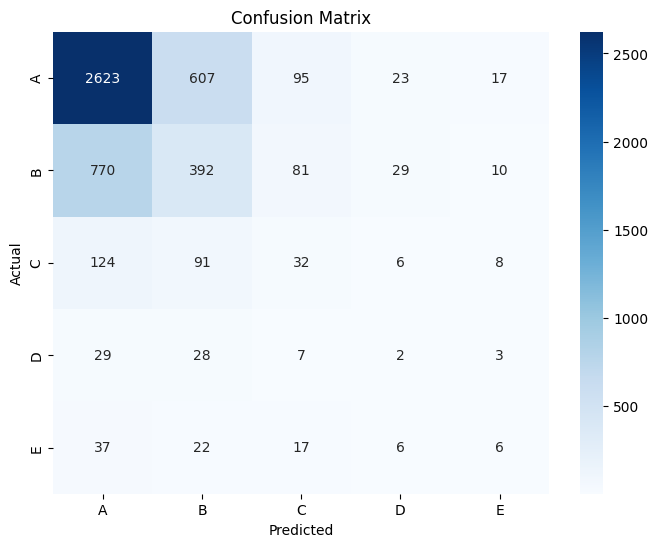

Classification Report:
              precision    recall  f1-score   support

           A       0.73      0.78      0.76      3365
           B       0.34      0.31      0.32      1282
           C       0.14      0.12      0.13       261
           D       0.03      0.03      0.03        69
           E       0.14      0.07      0.09        88

    accuracy                           0.60      5065
   macro avg       0.28      0.26      0.27      5065
weighted avg       0.58      0.60      0.59      5065



In [25]:
# Select the top 3 most important features
top_features = feature_importances.head(4).index
X_top = data[top_features]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Cross-validation
cv_scores = cross_val_score(model, X_top, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=top_features, class_names=model.classes_, filled=True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


In [27]:
data.describe()

,fire_year,current_size,fire_location_latitude,fire_location_longitude,discovered_size,assessment_hectares,fire_spread_rate,temperature,relative_humidity,wind_speed,fire_fighting_start_size,distance_from_water_source,bh_hectares,uc_hectares,to_hectares,ex_hectares
count,25321.000000,25321.000000,25321.000000,25321.000000,146.000000,25321.000000,22569.000000,22501.000000,22499.000000,22498.000000,18133.000000,7093.000000,25321.000000,25321.000000,2644.000000,25296.000000
mean,2013.738754,232.858316,54.984228,-115.216733,18.724110,2.414039,0.895605,17.851371,45.378595,8.812606,7.414416,2.556055,160.347548,245.567549,1.832629,175.639549
std,5.147857,6441.393429,2.614644,2.331129,207.096707,61.120486,2.611101,7.618052,18.683770,8.425867,157.138469,20.288906,6177.023220,7352.407194,13.141172,5852.223030
min,2006.000000,0.010000,48.998195,-119.999983,0.000000,0.010000,-1.000000,-39.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000
25%,2009.000000,0.010000,53.193994,-116.801860,0.010000,0.010000,0.000000,14.000000,31.000000,3.000000,0.010000,0.500000,0.010000,0.010000,0.010000,0.010000
50%,2014.000000,0.020000,55.316750,-115.158393,0.010000,0.010000,0.000000,19.000000,40.000000,6.000000,0.020000,1.000000,0.020000,0.020000,0.015000,0.020000
75%,2018.000000,0.300000,56.786150,-114.318550,0.100000,0.200000,1.000000,23.000000,56.000000,12.000000,0.300000,2.000000,0.300000,0.300000,0.200000,0.300000
max,2023.000000,577646.800000,59.999510,-110.000917,2500.000000,6019.000000,100.000000,39.900000,100.000000,90.000000,9999.000000,700.000000,602417.000000,707648.000000,251.800000,577646.800000
